<a href="https://colab.research.google.com/github/AnirbanMukherjeeXD/cnn-mnist-digits/blob/master/CNN_MNIST_Functional_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [0]:
dataset=pd.read_csv('sample_data/mnist_train_small.csv',header=None)
dataset_test=pd.read_csv('sample_data/mnist_test.csv',header=None)

In [0]:
X_train=dataset.iloc[:,1:].values.reshape(dataset.iloc[:,1:].shape[0],28,28,1)
Y_train=dataset.iloc[:,0].values

In [0]:
X_test=dataset_test.iloc[:,1:].values.reshape(dataset_test.iloc[:,1:].shape[0],28,28,1)
Y_test=dataset_test.iloc[:,0].values

In [0]:
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [0]:
X_train.shape

(20000, 28, 28, 1)

In [0]:
X_test.shape

(10000, 28, 28, 1)

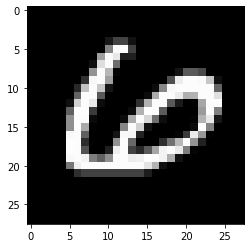

In [29]:
plt.gray()
plt.imshow(X_train[0].reshape(28,28))

In [0]:
img=np.array(X_train[0].reshape(28,28))

##CNN

In [0]:
from tensorflow.keras.models import Model,load_model
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

In [0]:
inp = Input(shape=(28,28,1))
conv1 = Conv2D(32, kernel_size=3, activation='relu')(inp)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(16, kernel_size=3, activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = Conv2D(8, kernel_size=2, activation='relu')(pool2)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
flat = Flatten()(pool3)
dense = Dense(128, activation='relu')(flat)
out = Dense(10, activation='softmax')(dense)

In [120]:
model = Model(inputs=inp, outputs=out)
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 16)        4624      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 8)           520       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 2, 2, 8)           0   

In [0]:
model = load_model('CNN-MNIST-functional.h5')

In [0]:
history=model.fit(X_train, Y_train, batch_size=25, epochs=50, validation_split=0.2,verbose=1)

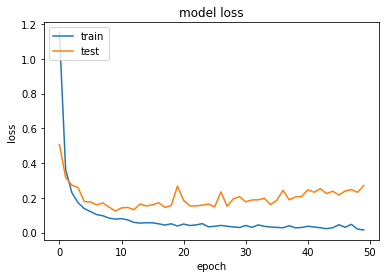

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
model.save("CNN-MNIST-functional.h5")

##TESTING##

In [0]:
image = X_train[0].astype(np.float32)

In [21]:
np.argmax(model.predict(X_train[0].reshape(1,28,28,1)))

6

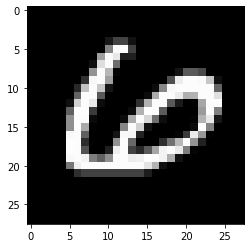

In [0]:
plt.gray()
plt.imshow(X_train[0].reshape(28,28))

##View Layer Outputs

###Conv 1

In [103]:
model = Model(inputs=inp, outputs=conv1)
model.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [0]:
pred=model.predict(X_train[0].reshape(1,28,28,1))

In [27]:
pred.shape[1]

26

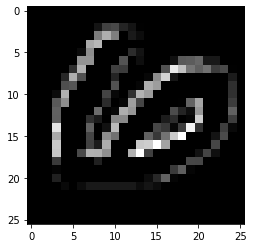

In [30]:
plt.imshow(pred.reshape(pred.shape[1],pred.shape[2],32)[:,:,4])

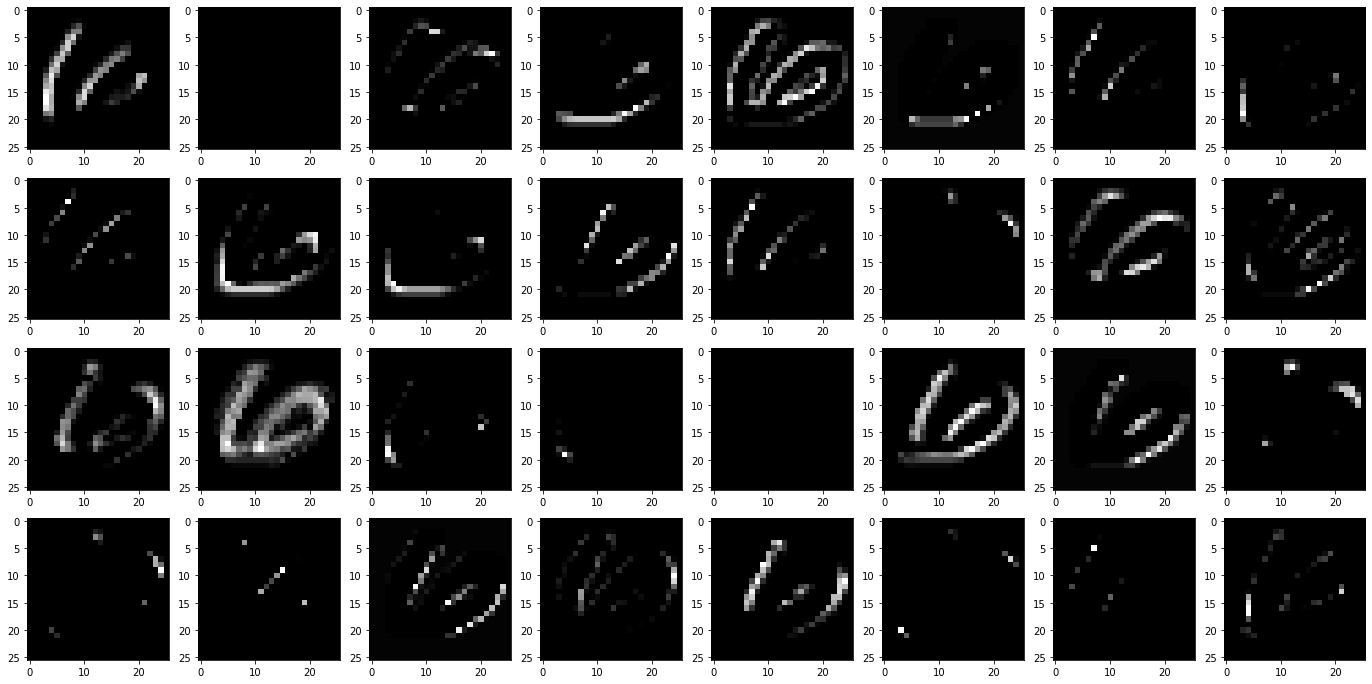

In [84]:
plt.figure(figsize=(24,12))
for i in range(32):
    plt.subplot(4,8,i+1)
    plt.imshow(pred.reshape(pred.shape[1],pred.shape[2],pred.shape[3])[:,:,i])

####Comparison of each kernels

In [0]:
pred=model.predict(X_train.reshape(X_train.shape[0],28,28,1))

**Kernel 0**

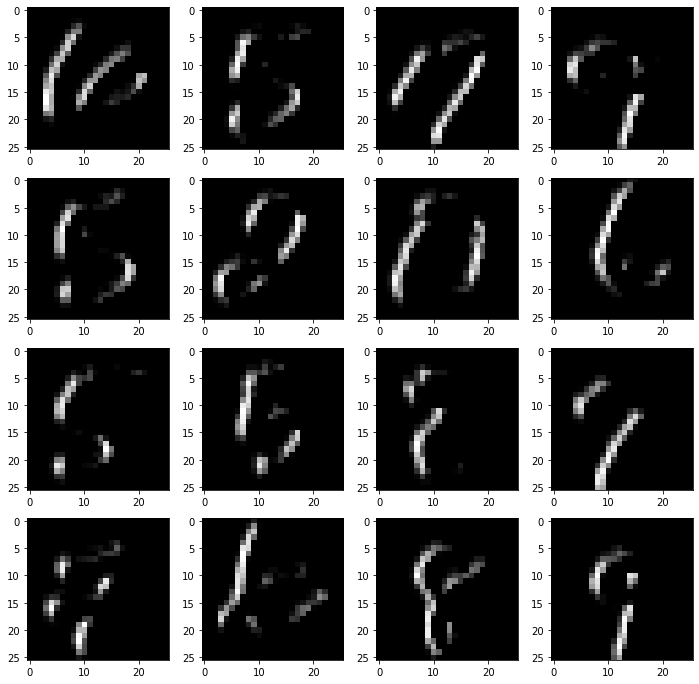

In [113]:
plt.figure(figsize=(12,12))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(pred[i][:,:,0])

**Kernel 21**

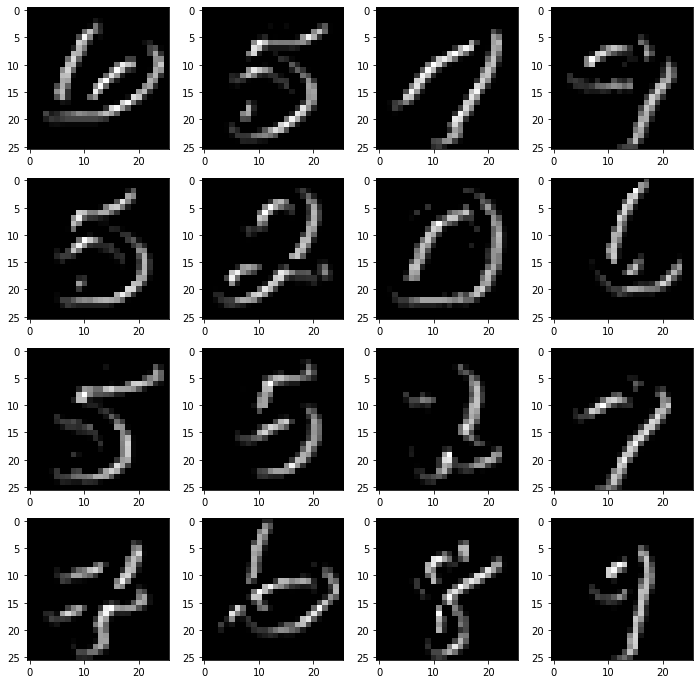

In [0]:
plt.figure(figsize=(12,12))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(pred[i][:,:,21])

**Kernel 17**

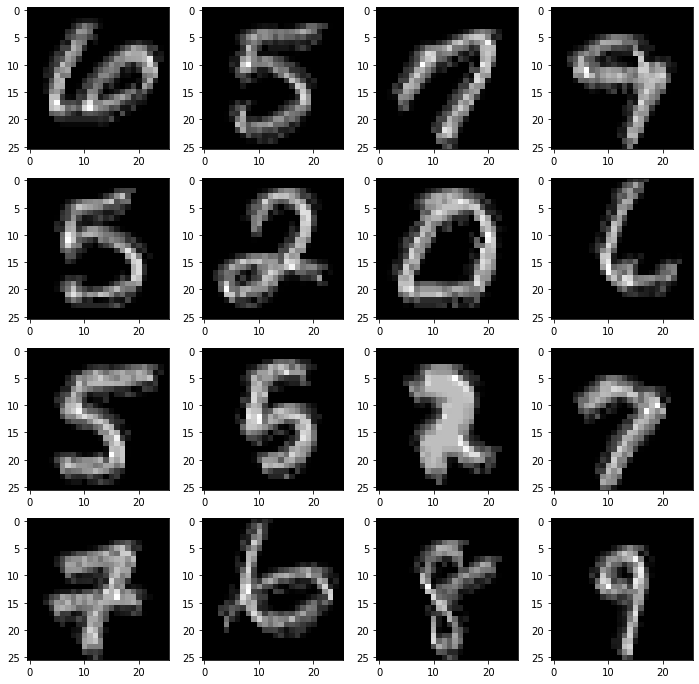

In [114]:
plt.figure(figsize=(12,12))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(pred[i][:,:,17])

###Conv 2

In [115]:
model = Model(inputs=inp, outputs=conv2)
model.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 16)        4624      
Total params: 4,944
Trainable params: 4,944
Non-trainable params: 0
_________________________________________________________________


In [0]:
pred=model.predict(X_train[0].reshape(1,28,28,1))

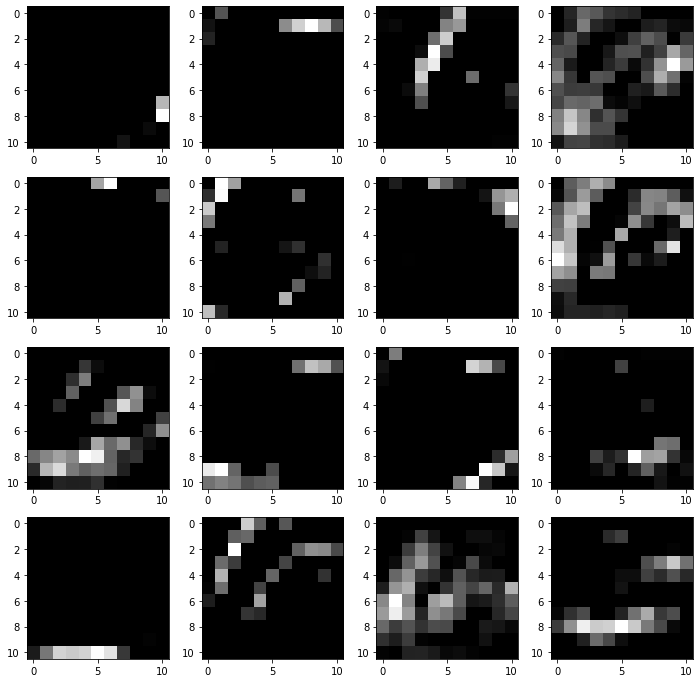

In [0]:
plt.figure(figsize=(12,12))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(pred.reshape(pred.shape[1],pred.shape[2],pred.shape[3])[:,:,i])

###Conv 2

In [85]:
model = Model(inputs=inp, outputs=conv2)
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 16)        4624      
Total params: 4,944
Trainable params: 4,944
Non-trainable params: 0
_________________________________________________________________


In [0]:
pred=model.predict(X_train[0].reshape(1,28,28,1))

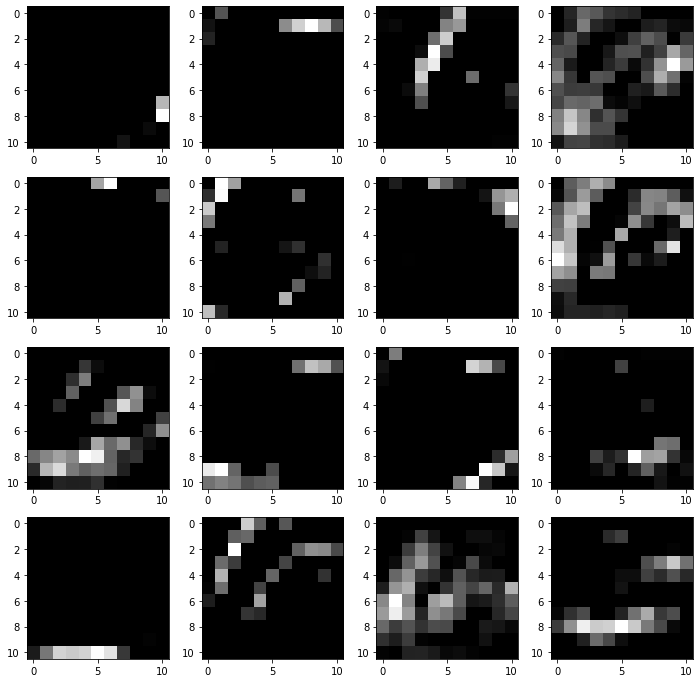

In [88]:
plt.figure(figsize=(12,12))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(pred.reshape(pred.shape[1],pred.shape[2],pred.shape[3])[:,:,i])

###Conv 3

In [90]:
model = Model(inputs=inp, outputs=conv3)
model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 16)        4624      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 8)           520       
Total params: 5,464
Trainable params: 5,464
Non-trainable params: 0
_________________________________________________________

In [0]:
pred=model.predict(X_train[0].reshape(1,28,28,1))

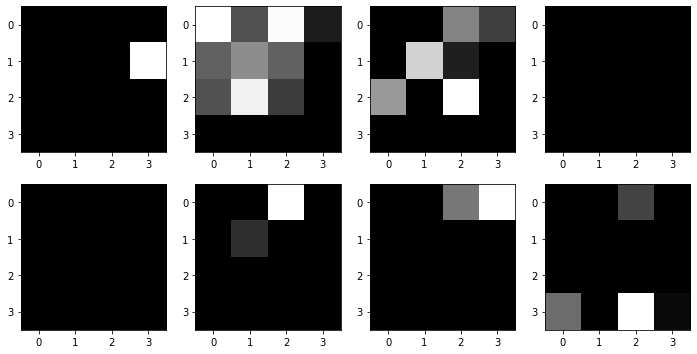

In [95]:
plt.figure(figsize=(12,6))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(pred.reshape(pred.shape[1],pred.shape[2],pred.shape[3])[:,:,i])